In [1]:
import pandas as pd
from scipy.optimize import minimize
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./bert_and_skew_stars_clean.csv')

## Creating a custom score

Let's create a custom score based on number of labels and stars. It should be a convex linear combination of the two and minimize the distance to both.

In [15]:
v1 = df['stars']
v2 = df['label']

In [44]:
def scalar_func(x):
  u = (x[0] * v1 + x[1] * v2)
  return norm(v1 - u)**2 + norm(v2 - u)**2

In [46]:
minimize(scalar_func, 
        [0.4, 0.4], 
        bounds=((0,1), (0,1)), 
        constraints=({'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1},)
)

     fun: 4469.5
     jac: array([0.00256348, 0.00292969])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.5, 0.5])

## Conclusion

The score should be 0.5 * label + 0.5 * stars

In [55]:
# Rename current score column to accuracy
df.rename(columns={'score': 'accuracy'}, inplace=True)
df.head(3)

,eleve,classe,min,max,commentaire,label,accuracy,skew,delta,scale,location,shape,stars
0,17.8,14.28,8.30,17.8,"Un excellent début d'année, poursuivez ainsi !",5,0.756478,0.6150,0.937612,3.013959,12.025239,2.696742,5
1,15.0,14.51,11.00,19.5,Bon ensemble.,4,0.489843,-0.3700,-0.864044,2.761004,16.413456,-1.716358,3
2,10.6,10.87,5.47,16.7,Résultats corrects mais le comportement en cla...,3,0.775267,-0.1075,-0.668329,2.364184,12.130700,-0.898454,3


In [57]:
df['score'] = 0.5 * df['label'] + 0.5 * df['stars']
df

,eleve,classe,min,max,commentaire,label,accuracy,skew,delta,scale,location,shape,stars,score
0,17.80,14.28,8.30,17.80,"Un excellent début d'année, poursuivez ainsi !",5,0.756478,0.6150,0.937612,3.013959,12.025239,2.696742,5,5.0
1,15.00,14.51,11.00,19.50,Bon ensemble.,4,0.489843,-0.3700,-0.864044,2.761004,16.413456,-1.716358,3,3.5
2,10.60,10.87,5.47,16.70,Résultats corrects mais le comportement en cla...,3,0.775267,-0.1075,-0.668329,2.364184,12.130700,-0.898454,3,3.0
3,15.50,14.24,6.00,19.00,Bon trimestre. Continuez ainsi !,4,0.485216,0.8700,0.983377,3.225933,11.708865,5.415736,4,4.0
4,14.75,12.67,6.00,18.25,Un bon trimestre.,4,0.472740,0.2725,0.816924,2.637196,10.951046,1.416440,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959,6.00,9.06,0.00,19.50,"L'ensemble, en recul, est fragile. Beaucoup de...",2,0.438044,-0.3450,-0.853420,2.730942,10.919582,-1.637337,1,1.5
6960,11.50,9.06,0.00,19.50,L'ensemble demeure honorable. Toujours beaucou...,5,0.522465,-0.3450,-0.853420,2.730942,10.919582,-1.637337,5,5.0
6961,6.00,9.06,0.00,19.50,L'ensemble demeure fragile malgré le sérieux.,2,0.501147,-0.3450,-0.853420,2.730942,10.919582,-1.637337,1,1.5
6962,17.00,9.06,0.00,19.50,L'ensemble demeure solide.,4,0.487701,-0.3450,-0.853420,2.730942,10.919582,-1.637337,5,4.5


In [73]:
# The score and label differe by less than one for 97% of the rows, and agrees 37% of the time
label_diff = abs(df['label']-df['score'])
label_diff.describe(), label_diff.quantile(0.37), label_diff.quantile(0.97)

(count    6964.000000
 mean        0.413914
 std         0.386777
 min         0.000000
 25%         0.000000
 50%         0.500000
 75%         0.500000
 max         1.500000
 dtype: float64,
 0.0,
 1.0)

In [78]:
# The score and stars differe by less than one for 97% of the rows and agrees 37% of the time
stars_diff = abs(df['stars']-df['score'])
stars_diff.describe(), stars_diff.quantile(0.37), stars_diff.quantile(0.97)

(count    6964.000000
 mean        0.413914
 std         0.386777
 min         0.000000
 25%         0.000000
 50%         0.500000
 75%         0.500000
 max         1.500000
 dtype: float64,
 0.0,
 1.0)

In [80]:
df['score'].value_counts()

4.0    1159
4.5    1027
3.5    1011
3.0     904
5.0     817
2.5     782
2.0     619
1.5     559
1.0      86
Name: score, dtype: int64

<AxesSubplot:title={'center':'stars'}, ylabel='Frequency'>

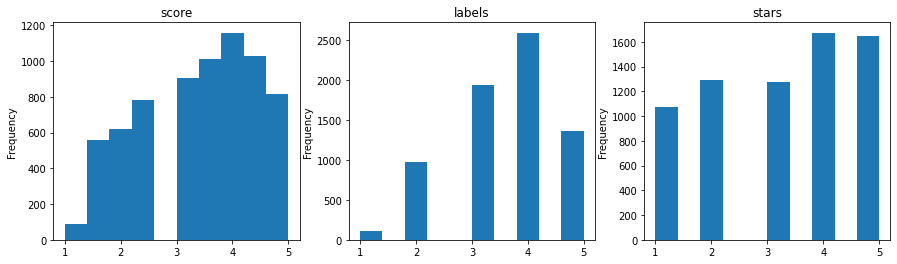

In [92]:
# Score has a nice repartition
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

df['score'].plot(kind="hist", ax=ax1, figsize=(15,4), title="score")
df['label'].plot(kind="hist", ax=ax2, figsize=(15,4), title="labels")
df['stars'].plot(kind="hist", ax=ax3, figsize=(15,4), title="stars")

In [103]:
df['rounded_score'] = df['score'].apply(lambda x: int(x))

In [104]:
df['rounded_score'].value_counts()

4    2186
3    1915
2    1401
5     817
1     645
Name: rounded_score, dtype: int64

<AxesSubplot:title={'center':'stars'}, ylabel='Frequency'>

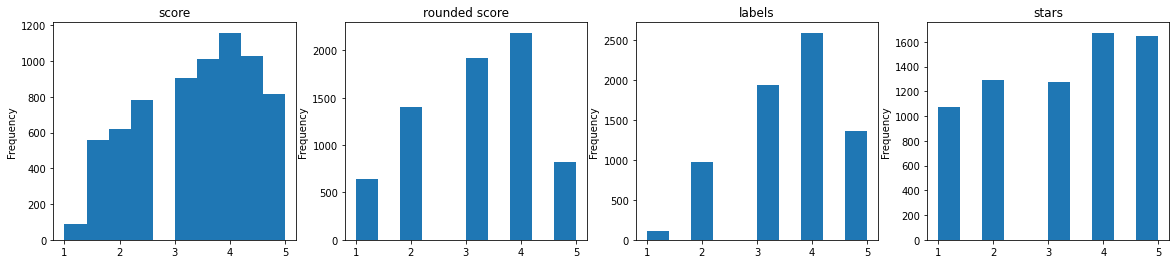

In [110]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

df['score'].plot(kind="hist", ax=ax1, figsize=(20,4), title="score")
df['rounded_score'].plot(kind="hist", ax=ax2, figsize=(20,4), title="rounded score")
df['label'].plot(kind="hist", ax=ax3, figsize=(20,4), title="labels")
df['stars'].plot(kind="hist", ax=ax4, figsize=(20,4), title="stars")


In [112]:
df.to_csv('./custom_rounded_score.csv', index=False)

In [3]:
df = pd.read_csv('./custom_rounded_score.csv')

In [5]:
for i in range(1,6):
  data = df[df['rounded_score'] == i]
  data.to_csv(f"./score_{i}.csv")

## Creating custom 3 stars score

5 level score means 5 models to train, which is as the same time less data to train for and more storage required.

In [5]:
df.head(2)

,eleve,classe,min,max,commentaire,label,accuracy,skew,delta,scale,location,shape,stars,score,rounded_score
0,17.8,14.28,8.3,17.8,"Un excellent début d'année, poursuivez ainsi !",5,0.756478,0.615,0.937612,3.013959,12.025239,2.696742,5,5.0,5
1,15.0,14.51,11.0,19.5,Bon ensemble.,4,0.489843,-0.370,-0.864044,2.761004,16.413456,-1.716358,3,3.5,3


In [6]:
def custom_star(score):
  if score <= 2:
    return 1
  elif score <= 3.5:
    return 2
  else:
    return 3 

In [8]:
df['custom_star'] = df['score'].apply(custom_star)

In [13]:
df['custom_star'].value_counts()

3    3003
2    2697
1    1264
Name: custom_star, dtype: int64

In [10]:
df.to_csv('./custom_star.csv', index=False)